In [22]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
token_df = pd.read_csv('token_dataframe.csv')

token_df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,price,variation5m,price1h,variation1h,price6h,variation6h,price24h,variation24h
0,2024-11-25 20:56:32,0xd5b99d57f9fbf5dac52fe1aeec0df5e481f5577b5e62...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67,Peanuts Brother,Wally,77500000000000000000,0.000115,0.000000,0.000112,2.078942,0.000118,-3.096393,0.000104,10.273919
1,2024-11-26 00:55:28,0x2f8b0ce2a4d780753d8c546507bfebeddd38028384d5...,0xd984a8b8587ab1fe9854aa4bc4365f9c73b95ab2,0x16cd00ca60c1d375b4a490c5aaf1212266a9828f,0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67,GEM OF DEGENS,DeGEM,335000000000000000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2024-11-26 01:04:00,0x2fc014e11b2465ba05db172f98965202393c89f7628c...,0xd984a8b8587ab1fe9854aa4bc4365f9c73b95ab2,0x16cd00ca60c1d375b4a490c5aaf1212266a9828f,0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67,GEM OF DEGENS,DeGEM,335000000000000000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2024-11-26 02:16:32,0xbed9f2f4a2082fe4452cb308b042d104c29305f817f9...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67,Peanuts Brother,Wally,74100000000000000000,0.000115,0.000000,0.000112,2.078942,0.000118,-3.096393,0.000104,10.273919
4,2024-11-26 09:40:16,0x56297db2fb597da823e114247f1decdeaabc2c607638...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67,Peanuts Brother,Wally,6878700000000000000,0.000115,0.000000,0.000112,2.078942,0.000118,-3.096393,0.000104,10.273919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2024-11-26 11:39:44,0x7e594cb1e1786ef3116ba4e7c03b26d50976cbdf0302...,0x3cfee83db8ddddc463c98d1224825a70de14a601,0x1121acc14c63f3c872bfca497d10926a6098aac5,0xd493b1934826eeabb260f55d7f51fdefa4b0eed5,Department Of Government Efficiency,DOGE,704458204249248148978,0.214391,-0.743525,0.213369,0.478910,0.222156,-3.495085,0.236625,-9.396333
159,2024-11-25 20:56:32,0xd5b99d57f9fbf5dac52fe1aeec0df5e481f5577b5e62...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,77500000000000000000,0.000115,0.000000,0.000112,2.078942,0.000118,-3.096393,0.000104,10.273919
160,2024-11-26 00:25:36,0x826f59efef57f4f10941cbaa8d298945a826ff3cc37d...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,97868689898689898788,0.000115,0.000000,0.000112,2.078942,0.000118,-3.096393,0.000104,10.273919
161,2024-11-26 02:16:32,0xbed9f2f4a2082fe4452cb308b042d104c29305f817f9...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,74100000000000000000,0.000115,0.000000,0.000112,2.078942,0.000118,-3.096393,0.000104,10.273919


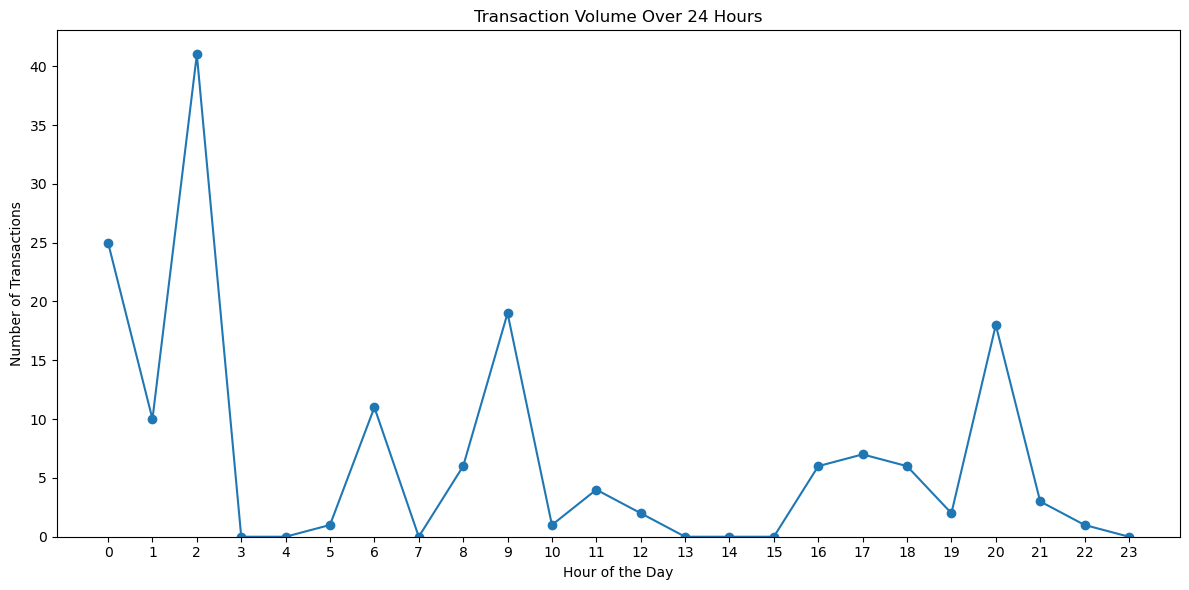

In [27]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Visualizing transaction volume over time if timeStamp exists
if "timeStamp" in token_df.columns:
    token_df['timeStamp'] = pd.to_datetime(token_df['timeStamp'])
    token_df['hour'] = token_df['timeStamp'].dt.hour
    transaction_volume = token_df.groupby('hour').size()
    
    # Create a new series with zeros and update with transaction volumes
    hours = range(24)
    volume_with_zeros = pd.Series(0, index=hours)
    volume_with_zeros.update(transaction_volume)
    
    plt.plot(volume_with_zeros.index, volume_with_zeros.values, marker='o')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Transactions')
    plt.title('Transaction Volume Over 24 Hours')
    plt.xticks(range(0, 24))
    plt.ylim(bottom=0)  # Set the baseline of the y-axis to 0
    plt.tight_layout()
    plt.show()


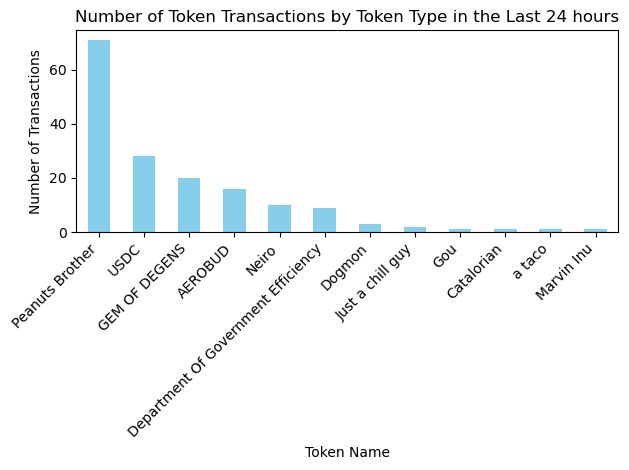

In [30]:
# Visualizing the number of token transactions by token type
token_counts = token_df["tokenName"].value_counts()
token_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Token Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Token Transactions by Token Type in the Last 24 hours')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability
plt.tight_layout()
plt.show()


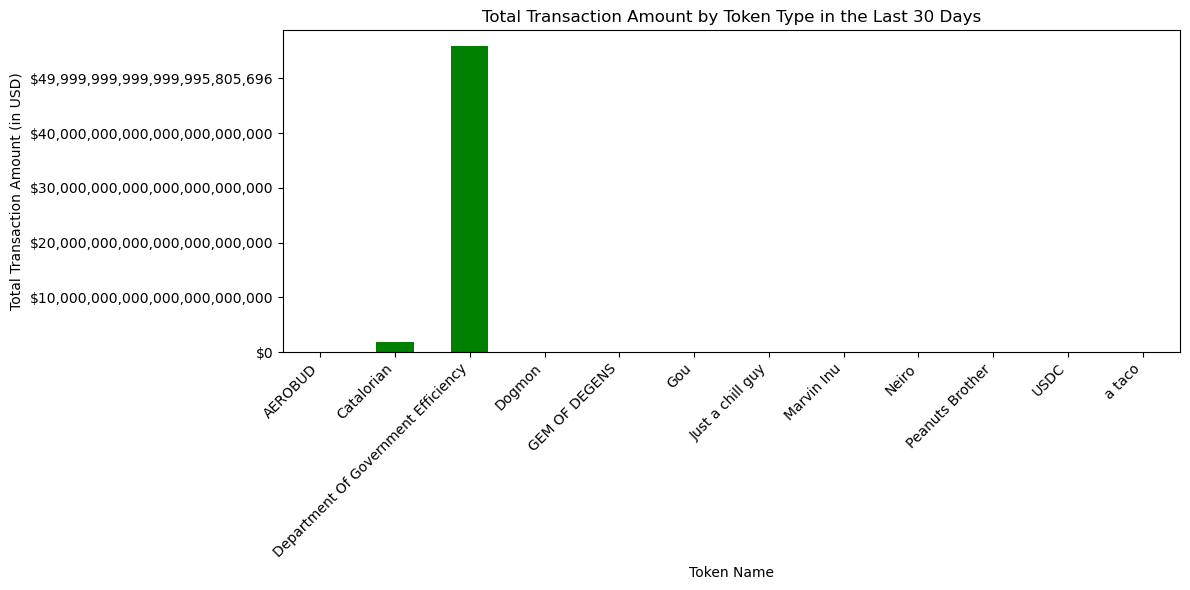

In [31]:
# Data Visualization: Transaction Amounts in USD
plt.figure(figsize=(12, 6))

# Calculating the total amount of USD of transactions by multiplying value and price
token_df['transaction_usd'] = token_df['value'].astype(float) * token_df['price'].astype(float)

# Aggregating transaction USD values by token type
token_value_agg_usd = token_df.groupby("tokenName")["transaction_usd"].sum()
token_value_agg_usd.plot(kind='bar', color='green')
plt.xlabel('Token Name')
plt.ylabel('Total Transaction Amount (in USD)')
plt.title('Total Transaction Amount by Token Type in the Last 30 Days')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability

# Format y-axis to reflect dollar amount without abbreviations
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '${:,.0f}'.format(x)))

plt.tight_layout()
plt.show()